In [253]:
# Import statistical modules
import pandas as pd
import numpy as np

# Import preprocessing modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import scipy

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


# Import neural network-related modules
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Activation, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [254]:
# Upload dataset
df=pd.read_csv('/Users/tatendakanyere/AmesHousing.csv')

In [255]:
# Remove unneccesary columns
df=df.drop(columns=['PID','Order'])

In [256]:
# Remove all columns containing NA values
df=df.dropna(axis=1)
df

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,8885,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,20,RL,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [257]:
# Correlate numerical values
df.corr()['SalePrice'].sort_values()

Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Yr Sold           -0.030569
Misc Val          -0.015691
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Lot Area           0.266549
2nd Flr SF         0.269373
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Gr Liv Area        0.706780
Overall Qual       0.799262
SalePrice          1.000000
Name: SalePrice, dtype: float64

In [258]:
# Correlate categorical variables
cat_df=df.select_dtypes(object)
dummy_df=pd.get_dummies(cat_df)
dummy_df['SalePrice']=df['SalePrice']
dummy_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.590897
Kitchen Qual_TA     -0.526721
Foundation_CBlock   -0.349642
Heating QC_TA       -0.338520
Lot Shape_Reg       -0.300461
                       ...   
Heating QC_Ex        0.454553
Exter Qual_Ex        0.480477
Foundation_PConc     0.520966
Kitchen Qual_Ex      0.537561
SalePrice            1.000000
Name: SalePrice, Length: 194, dtype: float64

In [259]:
def format_data(df):
    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df)
    
#     Add all variables into the dataframe
    most_correlated = df.corr().abs()['SalePrice'].sort_values(ascending=True)
    df = df.loc[:, most_correlated.index]
    return df
# All variables are now apppended to the dataframe
df=format_data(df)

In [260]:
# Check the columns in the dataframe
df 

,Foundation_Wood,Roof Matl_Metal,Sale Type_ConLI,Condition 1_RRAn,Condition 2_RRAe,Sale Type_CWD,House Style_2.5Unf,Roof Style_Flat,Roof Matl_ClyTile,Lot Config_Corner,...,Kitchen Qual_TA,Year Remod/Add,Kitchen Qual_Ex,Full Bath,Year Built,Exter Qual_TA,1st Flr SF,Gr Liv Area,Overall Qual,SalePrice
0,0,0,0,0,0,0,0,0,0,1,...,1,1960,0,1,1960,1,1656,1656,6,215000
1,0,0,0,0,0,0,0,0,0,0,...,1,1961,0,1,1961,1,896,896,5,105000
2,0,0,0,0,0,0,0,0,0,1,...,0,1958,0,1,1958,1,1329,1329,6,172000
3,0,0,0,0,0,0,0,0,0,1,...,0,1968,1,2,1968,0,2110,2110,7,244000
4,0,0,0,0,0,0,0,0,0,0,...,1,1998,0,2,1997,1,928,1629,5,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,1,1984,0,1,1984,1,1003,1003,6,142500
2926,0,0,0,0,0,0,0,0,0,0,...,1,1983,0,1,1983,1,902,902,5,131000
2927,0,0,0,0,0,0,0,0,0,0,...,1,1992,0,1,1992,1,970,970,5,132000
2928,0,0,0,0,0,0,0,0,0,0,...,1,1975,0,1,1974,1,1389,1389,5,170000


In [261]:
# Produce a numpy representation of the dataset
df=df.values

In [262]:
# Define the target column and predictor columns
X=df[:,0:218]
Y=df[:,218]

In [263]:
# Check that you have formatted X and Y correctly
print(X)

[[   0    0    0 ... 1656 1656    6]
 [   0    0    0 ...  896  896    5]
 [   0    0    0 ... 1329 1329    6]
 ...
 [   0    0    0 ...  970  970    5]
 [   0    0    0 ... 1389 1389    5]
 [   0    0    0 ...  996 2000    7]]


In [264]:
# Import train/test split
from sklearn.model_selection import train_test_split

In [266]:
# function to produce train/test data
def train_test_df(df):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test
train_test_df(df)

(array([[   0,    0,    0, ..., 1431, 1431,    7],
        [   0,    0,    0, ...,  880, 1700,    7],
        [   0,    0,    0, ..., 1787, 1787,    8],
        ...,
        [   0,    0,    0, ...,  864, 1728,    6],
        [   0,    0,    0, ...,  960, 1740,    5],
        [   0,    0,    0, ...,  768,  768,    5]]),
 array([[   0,    0,    0, ...,  833, 1666,    8],
        [   0,    0,    0, ...,  494, 1030,    6],
        [   0,    0,    0, ...,  806, 1724,    7],
        ...,
        [   0,    0,    0, ..., 1652, 1652,    9],
        [   0,    0,    0, ..., 1566, 1566,    8],
        [   0,    0,    0, ...,  825, 1412,    6]]),
 array([192000, 148400, 275000, ..., 207500, 122250, 133900]),
 array([161000, 116000, 196500, 123600, 126000, 174190, 200000, 148500,
         88750, 409900, 235000, 246900,  85500, 145000,  95000, 160500,
        147000, 192500, 124000, 137500, 198900, 140000, 200000, 192500,
        185000, 306000, 392000, 195000, 197900, 227680, 185900,  87000,
       

In [290]:
# Just in case you need to clear the model memory 
keras.backend.clear_session()

In [291]:
X_train, X_test, y_train, y_test= train_test_df(df)

In [292]:
# Scale the data to have the values centralise at 0, this will improve neural network performance
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

In [293]:
# Check the data to see it has been scaled
X_train

array([[-0.04776004, -0.02133948, -0.06413537, ...,  0.70655033,
        -0.1305532 ,  0.66898308],
       [-0.04776004, -0.02133948, -0.06413537, ..., -0.71621016,
         0.39658768,  0.66898308],
       [-0.04776004, -0.02133948, -0.06413537, ...,  1.62579305,
         0.56707562,  1.38558757],
       ...,
       [-0.04776004, -0.02133948, -0.06413537, ..., -0.75752444,
         0.45145736, -0.04762142],
       [-0.04776004, -0.02133948, -0.06413537, ..., -0.50963876,
         0.47497294, -0.76422592],
       [-0.04776004, -0.02133948, -0.06413537, ..., -1.00541011,
        -1.42978892, -0.76422592]])

In [294]:
# Create the layers of the deep neural network
NN=Sequential()
NN.add(Dense(218,kernel_initializer='normal',input_dim=218,activation='relu'))
NN.add(Dense(218, kernel_initializer='normal',activation='relu'))
NN.add(Dense(218, kernel_initializer='normal',activation='relu'))
NN.add(Dense(218, kernel_initializer='normal',activation='relu'))
NN.add(Dense(1,))

In [295]:
# define the loss metric and optimiser
NN.compile(loss='mean_squared_error', optimizer='adam')
NN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 218)               47742     
_________________________________________________________________
dense_2 (Dense)              (None, 218)               47742     
_________________________________________________________________
dense_3 (Dense)              (None, 218)               47742     
_________________________________________________________________
dense_4 (Dense)              (None, 218)               47742     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 219       
Total params: 191,187
Trainable params: 191,187
Non-trainable params: 0
_________________________________________________________________


In [296]:
# Have checkpoints so you can see which weights were the most effective
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

Train on 1647 samples, validate on 550 samples
Epoch 1/200
1647/1647 [==============================] - 0s 268us/step - loss: 37417289811.3127 - val_loss: 31095971475.0836

Epoch 00001: val_loss improved from inf to 31095971475.08364, saving model to Weights-001--31095971475.08364.hdf5
Epoch 2/200
1647/1647 [==============================] - 0s 133us/step - loss: 11817706985.1512 - val_loss: 2898827360.8145

Epoch 00002: val_loss improved from 31095971475.08364 to 2898827360.81455, saving model to Weights-002--2898827360.81455.hdf5
Epoch 3/200
1647/1647 [==============================] - 0s 129us/step - loss: 1602376761.7438 - val_loss: 1626800954.8800

Epoch 00003: val_loss improved from 2898827360.81455 to 1626800954.88000, saving model to Weights-003--1626800954.88000.hdf5
Epoch 4/200
1647/1647 [==============================] - 0s 130us/step - loss: 1077447735.6454 - val_loss: 1363917942.5745

Epoch 00004: val_loss improved from 1626800954.88000 to 1363917942.57455, saving model to

Epoch 38/200
1647/1647 [==============================] - 0s 127us/step - loss: 123917545.4693 - val_loss: 795801023.9418

Epoch 00038: val_loss improved from 796082170.98182 to 795801023.94182, saving model to Weights-038--795801023.94182.hdf5
Epoch 39/200
1647/1647 [==============================] - 0s 131us/step - loss: 118405047.3103 - val_loss: 798550242.5164

Epoch 00039: val_loss did not improve from 795801023.94182
Epoch 40/200
1647/1647 [==============================] - 0s 125us/step - loss: 116716853.6272 - val_loss: 777987203.2145

Epoch 00040: val_loss improved from 795801023.94182 to 777987203.21455, saving model to Weights-040--777987203.21455.hdf5
Epoch 41/200
1647/1647 [==============================] - 0s 211us/step - loss: 120370799.0674 - val_loss: 811451994.0509

Epoch 00041: val_loss did not improve from 777987203.21455
Epoch 42/200
1647/1647 [==============================] - 0s 171us/step - loss: 130184051.4390 - val_loss: 816109394.2400

Epoch 00042: val_loss d

1647/1647 [==============================] - 0s 170us/step - loss: 80556207.6988 - val_loss: 802377029.9200

Epoch 00080: val_loss did not improve from 708653145.19273
Epoch 81/200
1647/1647 [==============================] - 0s 146us/step - loss: 75719167.7511 - val_loss: 794933156.4218

Epoch 00081: val_loss did not improve from 708653145.19273
Epoch 82/200
1647/1647 [==============================] - 0s 200us/step - loss: 82033325.3188 - val_loss: 796826969.9491

Epoch 00082: val_loss did not improve from 708653145.19273
Epoch 83/200
1647/1647 [==============================] - 0s 152us/step - loss: 94176680.1190 - val_loss: 747731896.6691

Epoch 00083: val_loss did not improve from 708653145.19273
Epoch 84/200
1647/1647 [==============================] - 0s 132us/step - loss: 80775122.7250 - val_loss: 858419642.1527

Epoch 00084: val_loss did not improve from 708653145.19273
Epoch 85/200
1647/1647 [==============================] - 0s 127us/step - loss: 76142582.1834 - val_loss: 80

1647/1647 [==============================] - 0s 127us/step - loss: 55191078.5088 - val_loss: 1513198481.3382

Epoch 00125: val_loss did not improve from 708653145.19273
Epoch 126/200
1647/1647 [==============================] - 0s 158us/step - loss: 50250678.7322 - val_loss: 1578648932.7855

Epoch 00126: val_loss did not improve from 708653145.19273
Epoch 127/200
1647/1647 [==============================] - 0s 128us/step - loss: 56060279.4317 - val_loss: 1549050840.2182

Epoch 00127: val_loss did not improve from 708653145.19273
Epoch 128/200
1647/1647 [==============================] - 0s 141us/step - loss: 60264897.3297 - val_loss: 1658672388.5236

Epoch 00128: val_loss did not improve from 708653145.19273
Epoch 129/200
1647/1647 [==============================] - 0s 140us/step - loss: 54913183.9223 - val_loss: 1656562626.7491

Epoch 00129: val_loss did not improve from 708653145.19273
Epoch 130/200
1647/1647 [==============================] - 0s 188us/step - loss: 50187980.5076 - va

1647/1647 [==============================] - 0s 147us/step - loss: 41867350.3898 - val_loss: 2645136569.8182

Epoch 00170: val_loss did not improve from 708653145.19273
Epoch 171/200
1647/1647 [==============================] - 0s 150us/step - loss: 45908012.8075 - val_loss: 2874399767.7818

Epoch 00171: val_loss did not improve from 708653145.19273
Epoch 172/200
1647/1647 [==============================] - 0s 153us/step - loss: 38780415.8446 - val_loss: 2804582748.1600

Epoch 00172: val_loss did not improve from 708653145.19273
Epoch 173/200
1647/1647 [==============================] - 0s 157us/step - loss: 37307052.1263 - val_loss: 2977746662.5164

Epoch 00173: val_loss did not improve from 708653145.19273
Epoch 174/200
1647/1647 [==============================] - 0s 128us/step - loss: 39932229.6163 - val_loss: 2903395180.1164

Epoch 00174: val_loss did not improve from 708653145.19273
Epoch 175/200
1647/1647 [==============================] - 0s 149us/step - loss: 49568551.7134 - va

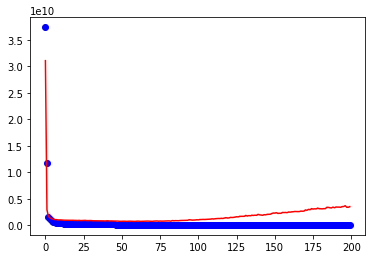

In [288]:
# Visualise the progress of the neural network
history= NN.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.25, callbacks=callbacks_list)

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values, 'bo', label='training loss')
plt.plot(val_loss_values,'r', label='training loss val')

In [289]:
# Check the RMSE, R2 and MAE of the model
from sklearn import metrics
from sklearn.metrics import r2_score
pred=NN.predict(X_test)
MSE=np.sqrt(metrics.mean_squared_error(pred,y_test))
MAE=metrics.mean_absolute_error(pred,y_test)
R2= r2_score(pred, y_test)
print('RMSE:',MSE)
print('MAE:',MAE)
print('R2:',R2)

RMSE: 38431.68942539851
MAE: 21996.707484225786
R2: 0.7703627622083072
